<a href="https://colab.research.google.com/github/Juanchp00/Anal-tica-de-datos/blob/main/Taller_2_anal%C3%ADtica_de_datos_donde_ambos_podemos_editar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller 2

**Juan José Chamorro Paz**
**817513**

**David Eduardo Giraldo Hernandez**
**818032**



##Consulta 
1. Consultar modelo, función de costo y estrategia de optimización de los 
siguientes clasificadores:

  * Naive Bayes
  * Linear discriminant analysis
  * SGD classifier
  * Linear SVC
  * SVC con kernel rbf
  * Random Forest
  * K neighbors classifier
  * Logistic Regression (es un clasificador no regresor)


2. A partir de la base de datos trabajada en el cuaderno 
https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_DeteccionClasificacionGH/pruebapeopleclasificacion.ipynb , realizar un análisis comparativo en términos de acierto, classification report, ROC, y AUC de los métodos del punto 1. Utilizar validación cruzada según el cuaderno referido. Discuta los resultados obtenidos y pruebe distintos pipelines que incluyan normalización standard scaler, min max, y sin normalización.



###Punto 1
  

####Naive Bayes


se basa en la suposición “ingenua” de Bayes la cual asume independencia condicional entre cada par de características dado el valor de la variable de clase.
El teorema de Bayes establece que 

$$P(y | x_1, ..., x_n)=\frac{P(y)P(x_1, ..., x_n|y)}{P(x_1, ..., x_n)} $$

asumiendo "ingenuamente" la independencia condicional: 

$$P(x_i|y,x_1,...,x_{i-1},x_{i+1},...,x_n)=P(x_i|y)$$

para todos $i$, por lo que 

$$P(y | x_1, ..., x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1, ..., x_n)} $$

Con $P(x_1,...,x_n)$ constante dada la entrada, se puede obtener la siguiente regla de clasificación

$$\hat y = arg max_y P(y)\prod_{i=1}^n P(x_i|y)$$

Usando la aproximación máxima (MAP) para encontrar $P(y)$ y $P(x_i|y)$.
Esta clasificación requiere una pequeña cantidad de datos de entrenamiento para estimar los parámetros necesarios, además, suelen ser mucho más rapidos que clasificadores más sofisticados, y cada distribución se puede estimar de forma independiente como una distribución unidimensional debido a el desacoplamiento de las distribuciones de características condicionales de clase, sin embargo, el clasificador "Naive Bayes" se cnsidera como un mal estimador, por lo que sus predicciones no son muy tomadas encuenta.

Uno de los clasificadores de "Naive Bayes" es el Gaussiano el cual implementa una probabilidad Gaussiana para su clasificación.

$$P(x_i|y)=\frac{1}{\sqrt{2\pi \sigma_{y}^2}} exp(-\frac{(x_i-\mu_y)^2}{2\sigma_y^2})$$

Los parametros $\sigma_y$ y $\mu_y$ se estiman utilizando la máxima verosimilitud.

**Código de importación**

from sklearn.naive_bayes import GaussianNB




####Linear discriminant analysis


Es un clasificador que utiliza la regla de Bayes, este ajusta una densidad gaussiana a cada clase asumiendo que todas las clases comparten la misma matriz de covarianza.

Para esta clasificación, se designa un límite de desición lineal que se genera tras el ajuste de las densidades condicionales de cada clase de datos.
 
El clasificador también se puede utilizar para reducir la dimensionalidad de la entrada, proyectándola en las direcciones más discriminatorias, al utilizar el método "Transform".

En su clase:

class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)

se pueden determinar los siguientes parámetros y atributos.
 
**Parámetros:**
* **solver: {‘svd’, ‘lsqr’, ‘eigen’}, default=’svd’** 

    Puede utilizar 3 valores
      * 'svd': Descomposición de valores singulares, es el valor predeterminado y como no calcula la matriz de covarianza, se recomienda para datos con gran cantidad de caracterizticas
      * 'lsqr': Solución de mínimos cuadrados. 
      * 'eigen': Descomposición de valores propios.

* **shrinkage: ‘auto’ or float, default=None**

  Parámetro de contracción que puede tomar ciertos valores:
      * None: No usa ninguna contracción, es el valor predeterminado.
      * 'auto': Encogimiento automático usando el lema Ledoit-Wolf.
      * float: Parámetro de contracción fijo, puede ser 0 ó 1.

* **priors: array-like of shape (n_classes,), default=None**

  Muestra las probabilidades previas. su valor predeterminado es '$None$' lo que significa que las proporciones de clase se infieren de los datos de entrenamiento.

* **n_component: sint, default=None**

  Número de componentes para la reducción de dimensionalidad, su valor predeterminado es '$None$' lo que significa que se establecerá con el mínimo, este parámetro solo afecta al método 'Transform'.

* **store_covariance: bool, default=False**

  Cuando el parametro es True se calcula explícitamente la matriz de covarianza ponderada dentro de la clase cuando el solucionador sea 'svd'.

* **tol: float, default=1.0e-4**

  Define el umbral que considera un valor como significativo, solo se usa si el solucionador es 'svd'.

* **covariance_estimator: covariance estimator, default=None**

  Si el parámetro es '$None$', covariance_estimator se utiliza para estimar las matrices de covarianza en lugar de depender del estimador de covarianza empírico.

**Atributos**
* **coef_: ndarray of shape (n_features,) or (n_classes, n_features)**

  Representa el vector de peso.

* **intercept_: ndarray of shape (n_classes,)**

  Representa el término de intersección.

* **covariance_: array-like of shape (n_features, n_features)**

  Corresponde a donde está la matriz de covarianza de las muestras en clase.

* **explained_variance_ratio_: ndarray of shape (n_components,)**

  Representa el porcentaje de varianza explicada por cada uno de los componentes seleccionados.

* **means_: array-like of shape (n_classes, n_features)**

  Representan la media de la clase. 

* **priors_: array-like of shape (n_classes,)**

  Representa el a priori de clase.

* **scalings_: array-like of shape (rank, n_classes - 1)**

  Representa la escala de las entidades en el espacio atravesado por los centroides de clase.

* **xbar_: array-like of shape (n_features,)**

  Representa la media general. Solo está presente si el solucionador es 'svd'.

* **classes_: array-like of shape (n_classes,)**

  Representa las etiquetas de clase únicas.


Para utilizarlo se debe importar como:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Analizar como:

clf = LinearDiscriminantAnalysis()

Entrenar como:

clf.fit()

y predecir como:

clf.predict()

####SGD classifier

Se trata de un clasificador que implementa modelos lineales regularizados con aprendizaje de descenso de gradiente estocástico (SGD), en donde el gadiente de la pérdida se estima en cada muestraa la vez y el modelo se actualiza a lo largo del camino con un programa de fuerza decreciente. 

Para obtener los mejores resultados utilizando el programa de tasa de aprendizaje predeterminado, los datos deben tener una media en cero y una varianza unitaria.

La implementación del clasificador funciona con datos representados como matrices densas o dispersas de valores de punto flotante para las características, y el modelo al que se ajusta se puede controlar con el parámetro de pérdida, este, por defecto, se ajusta a una máquina de vectores de soporte lineal (SVM).


En su clase:

class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

se pueden determinar los siguientes parámetros y atributos.

**Parámetros**:
* **losss: tr, default=’hinge’**

  Representa la función de pérdida que se utilizará. El valor predeterminado es "bisagra", que proporciona una SVM lineal.

  Las opciones posibles son 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron' o una pérdida de regresión: 'squared_loss', 'huber', 'epsilon_insensitive' o 'squared_epsilon_insensitive'.

  La pérdida 'logarítmica' da una regresión logística, un clasificador probabilístico. 'modified_huber' es otra pérdida suave que aporta tolerancia a valores atípicos, así como estimaciones de probabilidad. 'squared_hinge' es como bisagra pero está penalizado cuadráticamente. 'perceptrón' es la pérdida lineal utilizada por el algoritmo del perceptrón. Las otras pérdidas están diseñadas para la regresión, pero también pueden ser útiles en la clasificación.

* **penalty:{‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’**

  Representa la penalización que se utilizará. El valor predeterminado es 'l2'.

* **alpha: float, default=0.0001**

  Representa la constante que multiplica el plazo de regularización. Cuanto mayor sea el valor, más fuerte será la regularización.

* **l1_ratio: float, default=0.15**

  Representa al parámetro de mezcla Elastic Net, con 0 <= l1_ratio <= 1. l1_ratio = 0 corresponde a la penalización L2, l1_ratio = 1 a L1. 

* **fit_intercept: bool, default=True**

  Muestra si la intersección debe estimarse o no. Si es falso, se supone que los datos ya están centrados.

* **max_iter: int, default=1000**

  Represena al número máximo de pasadas sobre los datos de entrenamiento.

* **tol: float, default=1e-3**

  Representa el criterio de parada. Si no es '$None$', el entrenamiento se detendrá cuando (loss> best_loss - tol) por n_iter_no_changeépocas consecutivas

* **shuffle: bool, default=True**

  Muesta si los datos de entrenamiento deben barajarse o no después de cada época.

* **verbose: int, default=0**

  Representa el nivel de verbosidad.

* **epsilon: float, default=0.1**

  Epsilon en las funciones de pérdida insensibles a épsilon; solo si losses 'huber', 'epsilon_insensitive' o 'squared_epsilon_insensitive'. Para 'huber', determina el umbral en el que se vuelve menos importante obtener la predicción exactamente correcta. Para los insensibles a épsilon, cualquier diferencia entre la predicción actual y la etiqueta correcta se ignora si es menor que este umbral.

* **n_jobs: int, default=None**

  Representa el número de CPU que se utilizarán para realizar el cálculo OVA (One Versus All, para problemas de varias clases). '$None$' significa 1 a menos que esté en un joblib.parallel_backendcontexto. -1significa utilizar todos los procesadores. 

* **random_state: int, RandomState instance, default=None**

  Se utiliza para mezclar los datos cuando shufflese establece en True.

* **learning_rate: str, default=’optimal’**

  Representa el ritmo de aprendizaje, puede ser:
      * 'constante': eta = eta0
      * 'óptimo': donde t0 es elegido por una heurística propuesta por Leon Bottou.eta = 1.0 / (alpha * (t + t0))
      * 'invscaling': eta = eta0 / pow(t, power_t)
      * 'adaptativo': eta = eta0, siempre que el entrenamiento siga disminuyendo.

* **eta0: double, default=0.0**

  Representa la tasa de aprendizaje inicial para los horarios "constante", "invscaling" o "adaptativo" su valor valor predeterminado es 0.0.

* **power_t: double, default=0.5**

  Representa el exponente de la tasa de aprendizaje de escala inversa, su valor predeterminado es 0,5.

* **early_stopping: bool, default=False**

  Se utiliza si se debe realizar la parada anticipada para finalizar el entrenamiento cuando la puntuación de validación no mejora. Si se establece en Verdadero, automáticamente apartará una fracción estratificada de los datos de entrenamiento como validación y finalizará el entrenamiento cuando la puntuación de validación devuelta por el scoremétodo no mejore en al menos tol para n_iter_no_change épocas consecutivas.

* **validation_fraction: float, default=0.1**

  Representa la proporción de datos de entrenamiento que se deben reservar como conjunto de validación para la detención anticipada. Debe estar entre 0 y 1.

* **n_iter_no_change: int, default=5**

  Representa el número de iteraciones sin mejora que esperar antes de detener el ajuste.

* **class_weight: dict, {class_label: weight} or “balanced”, default=None**

  Representa los pesos asociados a clases. Si no se da, se supone que todas las clases tienen un peso uno.

* **warm_start:bool, default=False**

  Si el parámetro se establece en True, reutiliza la solución de la llamada anterior para que encaje como inicialización; de lo contrario, simplemente borra la solución anterior.

* **average: bool or int, default=False**

  Si el paráetro se establece en Verdadero, se calcula los pesos SGD promediados en todas las actualizaciones y se almacena el resultado en el coef_atributo.


**Atributos**:
* **coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)**

  Representa los pesos asignados a las características.

* **intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,)**

  Representa las constantes en función de decisión.

* **n_iter_: int**

  Representa el número real de iteraciones antes de alcanzar el criterio de parada.

* **loss_function_: concrete**
* **classes_: array of shape (n_classes,)**
* **t_: int**

  Representa el número de actualizaciones de peso realizadas durante el entrenamiento.


El clasificador se importa mediante:

from sklearn.linear_model import SGDClassifier

se entrena mediante:

funcion.fit(X, Y)

y se predice mediante:

funcion.predict()

####Linear SVC

Se trata de una clasificación lineal de vectores, la cual funciona igual que el SVC kernel cuando el parámetro $kernel=lineal$, sin embargo, a diferencia de este, tiene mayor flexibilidad en la elección de penalizaciones, funciones de pérdida, y escala mejor a un gran número de muestras.

Además, esta clase admite entradas densas y dispersas y el soporte multiclase se maneja de acuerdo con un esquema de uno contra el resto.

En su clase:

class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)

Se pueden determinar los siguientes parámetros y atributos.

**Parámetros**

  * **penalty: {‘l1’, ‘l2’}, default=’l2’**

  especifica la norma que se utilizará en la penalización. la penalización ‘L2’ es la predeterminada para esta clase. 

  * **loss: {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’**

  Especifica la función de pérdida. ‘hinge’ es la pérdida predeterminado de SVM, mientras que ‘squared_hinge’ es el cuadrado de la perdida 'hinge'. No se admite la combinacion de la penalidad 'L1' y la pérdida 'hinge'.

  * **dual: bool, default=True**

  Selecciona el algoritmo para resolver el problema de optimizacion primario o dual. Se usa preferiblemente $dual=False$ cuando $n_muestras > n_caracteristicas$.

  * **tol: float, default=1e-4**

  Representa la tolerancia a los críticos de parada.

  * **C: float, default=1.0**

  Representa el parámetro de regularización. La fuerza de regularización es inversamente proporcional al parámetro C. Debe ser estrictamente positiva.

  * **multi_class: {‘ovr’, ‘crammer_singer’}, default=’ovr’**

  Determina la estrategia multiclases si contiene mas de 2 clases. El "ovr" entrena n_clases uno contra el resto de clasificadores, mientras que, "crammer_singer" optimiza un objetivo conjunto de todas las clases. si se escoje "crammer_singer", la opción de perdida, penalización y dual se ignoran.

  * **fit_intercept: bool, default=True**

  Calcula la intercepción del modelo. Si se establece como $false$, se espera que los datos esten centrados y no se calculará ningúna intersección.

  * **intercept_scaling: float, default=1**

  Cuando 'self.fit_intercept' esta establecido como $True$, la instancia del vector x se conviete en [x, self.intercept_scaling]. 

  * **class_weight: dict or ‘balanced’, default=None**

  Establece el parámetro C de la clase i en 'class_weight[i]*C' para SVC. si no se da, se supone que todas las clases tienen peso unitario. El modo “balanced”utiliza los valores de y para ajustar automaticamente los pesos de forma inversamente proporcional a las frequencias de la clase en los datos de entrada como n_muestras / (n_clases * np.bincount(y)).

  * **verbose: int, default=0**

  Habilita la salida 'verbose'. Esta configuración arovecha la configuración del tiempo de ejecución de pre-proceso en liblinear, la cual, si se encuentra habilitada, puede que no trabaje adecuadamente en un contexto multiproceso.

  * **random_state: int, RandomState instance or None, default=None**

  Controla la generacion de números 'pseudo aleatorios' para mezclar los datos para el descenso de cordenadas dual (si dual=True). Cuando dual=False la implementación subyacente de LinearSVC no es aleatoria y 'random_state' no tiene efecto en los resultados.

  * **max_iter: int, default=1000**

 Representa el máximo número de interacciones para ejecutar.

**Atributos**

  * **coef_: ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)**

  Corresponde a los pesos asignados a las caracteristicas.

  * **intercept_: ndarray of shape (1,) if n_classes == 2 else (n_classes,)**

  Represeta a las constantes en función de desición.

  * **classes_: ndarray of shape (n_classes,)**

  Representa las etiquetas de clases únicas.

  * **n_iter_: int**

  Representa al número máximo de iteraciones que se ejecutan en todas las clases.

Para importar el clasificador se utiliza:

from sklearn.svm import LinearSVC

se entrena mediante:

funcion.fit(X, Y)

y se predice mediante:

funcion.predict()

####SVC con kernel rbf

Se trata de un clasificador de vectores de soporte C, cuya implementación se basa en libsvm. A sy¡u vez, el tiempo de ajuste se escala es al menos cuadráticamente con el número de muestras y puede resultar poco práctico más allá de decenas de miles de muestras.

El soporte multiclase de el clasificador se maneja de acuerdo con un esquema de uno contra uno.

En su clase:

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

Se pueden determinar los siguientes parámetros y atributos.

**Parameters**

  * **C: float, default=1.0**
  
  Parámetro de regularización. La fuerza de la regularización es inversamente proporcional a C. Debe ser estrictamente positiva. La penalización es una penalización de 12 al cuadrado.

  * **kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’**

  Especifica el tipo de kernel que se utilizará en el algoritmo. Debe ser 'lineal', 'poli', 'rbf', 'sigmoide', 'precalculado' o invocable. Si no se proporciona ninguno, se utilizará 'rbf'. Si se proporciona un invocable, se utiliza para precalcular la matriz del núcleo a partir de matrices de datos; esa matriz debe ser una matriz de formas .(n_muestras, n_muestras)

  * **degree: int, default=3**

  Grado de la función del núcleo polinomial ('poli'). Es ignorado por todos los demás núcleos.

  * **gamma: {‘scale’, ‘auto’} or float, default=’scale’**

 Coeficiente de kernel para 'rbf', 'poli' y 'sigmoide'.

  Si gamma='scale' (por defecto) entonces usa 1 / (n_caracteristicas * X.var ()) como valor de gamma,

  Si gamma= ‘auto’, usa 1 / n_caracteristicas.

  * **coef0: float, default=0.0**

  Término independiente en función del kernel. Solo es significativo en 'poli' y 'sigmoide'.

  * **shrinking: bool, default=True**

  Usa la heurística de encogimiento.

  * **probability: bool, default=False**

  Habilita estimaciones de probabilidad, debe estar habilitado antes de llamar fit.

  * **tol: float, default=1e-3**

  Tolerancia al criterio de parada.

  * **cache_size: float, default=200**

  Especifica el tamaño del cache de kernel en (MB).

  * **class_weight: dict or ‘balanced’, default=None**

  Establece el parámetro C de la clase i en 'class_weight[i]*C' para SVC. si no se da, se supone que todas las clases tienen peso unitario. El modo “balanced”utiliza los valores de y para ajustar automaticamente los pesos de forma inversamente proporcional a las frequencias de la clase en los datos de entrada como n_muestras / (n_clases * np.bincount(y)).

  * **verbose: bool, default=False**

  Habilita la salida 'verbose'. Esta configuración arovecha la configuración del tiempo de ejecución de pre-proceso en liblinear, la cual, si se encuentra habilitada, puede que no trabaje adecuadamente en un contexto multiproceso.

  * **max_iter: int, default=-1**

  Límite estricto de iteraciones dentro del solucionador, si es -1, significa que no hay límite.

  * **decision_function_shape: {‘ovo’, ‘ovr’}, default=’ovr’**

  Se utiliza para devolver una función de decisión uno contra el resto ('ovr') de la forma (n_muestras, n_clases) como todos los demás clasificadores, o la función de decisión original uno contra uno ('ovo') de libsvm que tiene la forma (n_muestras , n_clases * (n_clases - 1) / 2). Sin embargo, la función uno contra uno ('ovo') siempre se usa como estrategia de clases múltiples. El parámetro se ignora para la clasificación binaria.

  * **break_ties: bool, default=False**

  Si es $True$, 'decision_function_shape' sera 'ovr'y se tommara el número de clases mayor a 2, para este caso, la predicción romperá los lazos de acuerdo con los valores de confianza de 'decision_function', De lo contrario, se devuelve la primera clase entre las clases empatadas.

  * **random_state: int, RandomState instance or None, default=None**

  Controla la generación de números pseudoaleatorios para mezclar los datos para estimaciones de probabilidad, cuando es $False$ ignora la probabilidad.

**Attributes**

  * **class_weight_: ndarray of shape (n_classes,)**

  Multiplicadores del parámetro C para cada clase. Calculado en base al class_weightparámetro.

  * **classes_: ndarray of shape (n_classes,)**

  Etiquetas de clases.

  * **coef_: ndarray of shape (n_classes * (n_classes - 1) / 2, n_features)**

 Pesos asignados a las características, solo está disponible en el caso de un kernel lineal.

  * **dual_coef_: ndarray of shape (n_classes -1, n_SV)**

 Coeficientes duales del vector de soporte en la función de decisión, multiplicados por sus objetivos. Para multiclases, coeficiente para todos los clasificadores 1 vs 1.

  * **fit_status_: int**

  0 si esta correctamente instalado, y 1 en otros casos.

  * **intercept_: ndarray of shape (n_classes * (n_classes - 1) / 2,)**

  Constantes en la función de decisión.

  * **support_: ndarray of shape (n_SV)**

  Indice de vectores de soporte.

  * **support_vectors_: ndarray of shape (n_SV, n_features)**

  Vectores de soorte.

  * **n_support_: ndarray of shape (n_classes,), dtype=int32**

  Número de soporte de vectores para cada clase.

  * **probA_: ndarray of shape (n_classes * (n_classes - 1) / 2)**
  * **probB_: ndarray of shape (n_classes * (n_classes - 1) / 2)**

  Si probabilidad es $True$, corresponde a los parámetros aprendidos en la escala de 'Platt' para producir estimaciones de probabilidad a partir de valores de decisión. Si probabilidad es $False$, corresponde a una matriz vacia. 
  
  * **shape_fit_:tuple of int of shape (n_dimensions_of_X,)**

  Dimensiones de matriz del vector de entenamiento X.

####Random Forest

####K neighbors classifier


####Logistic Regression (es un clasificador no regresor)

### Punto 2

####Librerias y funciones

In [ ]:
import os
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.base import  BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

warnings.filterwarnings("ignore")
#%% Analisis exploratorio basico - base de datos housing
def pre_exploratorio(Xtrain_pre,ytrain_pre,path_img,col_sal,w,h,Np=None):
    #exploratorio basico -> Normalizar + reduccion de dimensionalidad
    normalizar = StandardScaler()
    #escoger aleatoriamente puntos para evitar costo computacional - analisis inicial
    if Np == None: Np = len(Xtrain_pre.index)
    
    ind = np.random.randint(0,len(Xtrain_pre.index),Np) #escoger subconjunto de datos
    
    Xz = normalizar.fit_transform(Xtrain_pre.iloc[ind,:])
    yc = ytrain_pre[ind].reshape(-1)
    
    #reduccion de dimension con pca y tsne
    red_pca = PCA()
    #perplexity = np.round(0.75*np.sqrt(Np))
    #red_tsne = TSNE(n_components=2,perplexity = perplexity, n_iter = 250,verbose = 10)
        
    Xred_pca = pd.DataFrame(red_pca.fit_transform(Xz))
    #Xred_tsne = pd.DataFrame(red_tsne.fit_transform(Xz))
  
    #Relevancia por variabilidad
    var_ret = 0.95
    rel_vec,Mv,ind_rel = rel_pca(red_pca,var_ret)
    
    #graficar
    sval = 30
    #pca 2D
    Xred_pca.plot(kind="scatter",x=0,y=1,
               c = yc, s=sval, label = col_sal,
              colormap = "jet",colorbar=True, sharex=False)    
    plt.title('PCA 2D')
    plt.xlabel('Componente principal 1')
    plt.ylabel('Componente principal 2')
    #save_fig(path_img,"red_PCA2D")
    plt.show()
    
    #relevancia pca 2D     
    plt.imshow(rel_vec.reshape(w,h),cmap='jet')
    plt.ylabel('Relevancia PCA - eigenfaces')
    plt.title('RELEVANCIA PCA - eigenfaces, var_ret=%.2f' % (var_ret))
    plt.colorbar()
    #save_fig(path_img,"relevancia_PCA_eigenface")
    plt.show()
    #tsne 2D
    #Xred_tsne.plot(kind="scatter",x=0,y=1,
    #           c = yc, s = sval, label = col_sal,
    #          colormap = "jet",colorbar=True, sharex=False)    
    #plt.title('t-sne 2D - Perp.=%.2f' % perplexity)
    #plt.xlabel('Embebimiento - Dim. 1')
    #plt.ylabel('Embebimiento - Dim. 2')
    #save_fig(path_img,"tsne_2D")
    #plt.show()
    
    return True
#%% relevancia por variabilidad con pca
def rel_pca(red,var_exp):
    Mv = np.min(np.where(np.cumsum(red.explained_variance_ratio_)
                         >var_exp))
    M,P = red.components_.shape
    #print(P,M)
    rel_vec = np.zeros((P))
    for i in range(Mv):
        #print(i)
        rel_vec += abs(red.explained_variance_ratio_[i]*red.components_[i,:])
    
    rel_vec = rel_vec/sum(rel_vec)
    rel_vec = rel_vec - min(rel_vec)
    rel_vec = rel_vec/max(rel_vec)
    
    ind_rel = rel_vec.argsort()[::-1]
    return rel_vec, Mv,ind_rel

#%%  guardar figuras
#from google.colab import files
def save_fig(path_img,fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(path_img, fig_id + "." + fig_extension)
    print("Guardando...", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    files.download(path) 
    
import seaborn as sns

def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):   
    lw = 2
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))

    #save_fig(path_img,title)
    plt.show()

    
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
#matriz confusión = #[[TN FP][FN TP]]
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    
# Compute ROC curve and ROC area for each class
def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes
    #fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
#Paso 1: Lectura
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#para acceder a archivos desde google drive en google colaboratory
#acceso a google drive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
#
#file_id = '1TDxi5fWoS1zraYYsk0IfoVB0XQt--HJw' #copiar nombre nombre del link de compartir despues de ID
#downloaded = drive.CreateFile({'id': file_id})
#downloaded.GetContentFile('funciones_people.py') 
#from funciones_people import pre_exploratorio, save_fig, plot_confusion_matrix, roc_multiclass, roc_auc_mc

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
#base de datos
from sklearn.datasets import fetch_lfw_people
#https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html

%matplotlib inline
#descargar base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#ejemplo imagen en base de datos
#print('Dimensiones base de datos: \n',lfw_people.images.shape)
#plt.imshow(lfw_people.images[30,:,:],cmap='gray')

#print('Clases base de datos: \n',lfw_people['target_names'])
#print(lfw_people.images[30,:,:])

Dimensiones tipo pandas:  (1288, 1850)


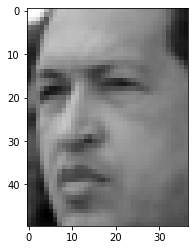

In [ ]:
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)/255
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
plt.imshow(np.array(Xdata.iloc[0,:]).reshape(lfw_people.images.shape[1],lfw_people.images.shape[2]),cmap='gray')

In [ ]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3) #fijar en 0.3 para entrenar -- 0.95 para demostrar funcionalidad del código

Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
1015,0.406536,0.416993,0.456209,0.482353,0.492810,0.508497,0.547712,0.567320,0.580392,0.603922,0.628758,0.644444,0.649673,0.650980,0.656209,0.656209,0.654902,0.647059,0.639216,0.633987,0.633987,0.626144,0.607843,0.594771,0.586928,0.556863,0.521569,0.494118,0.471895,0.432680,0.383007,0.350327,0.359477,0.420915,0.423529,0.345098,0.324183,0.431373,0.423529,0.454902,...,0.350327,0.088889,0.052288,0.419608,0.780392,0.819608,0.610458,0.397386,0.329412,0.337255,0.381699,0.448366,0.470588,0.474510,0.494118,0.513726,0.505882,0.490196,0.457516,0.454902,0.444444,0.443137,0.447059,0.462745,0.461438,0.460131,0.460131,0.466667,0.473203,0.449673,0.409150,0.447059,0.735948,0.932026,0.918954,0.848366,0.720261,0.406536,0.107190,0.054902
246,0.609150,0.626144,0.628758,0.637909,0.660131,0.669281,0.679739,0.687582,0.701961,0.741176,0.784314,0.801307,0.803922,0.798693,0.810458,0.807843,0.786928,0.777778,0.776471,0.764706,0.752941,0.737255,0.722876,0.699346,0.690196,0.678431,0.630065,0.576471,0.530719,0.488889,0.440523,0.428758,0.575163,0.586928,0.303268,0.147712,0.147712,0.601307,0.616993,0.623529,...,0.083660,0.079739,0.077124,0.828758,0.836601,0.818301,0.840523,0.869281,0.875817,0.700654,0.441830,0.352941,0.341176,0.326797,0.324183,0.325490,0.321569,0.341176,0.371242,0.368627,0.354248,0.351634,0.350327,0.332026,0.308497,0.274510,0.283660,0.318954,0.315033,0.394771,0.579085,0.762091,0.854902,0.879739,0.862745,0.675817,0.185621,0.084967,0.078431,0.075817
881,0.466667,0.516340,0.460131,0.496732,0.568627,0.490196,0.416993,0.428758,0.479739,0.504575,0.486275,0.513726,0.543791,0.571242,0.600000,0.614379,0.607843,0.601307,0.603922,0.568627,0.512418,0.477124,0.426144,0.313726,0.227451,0.247059,0.333333,0.389542,0.366013,0.359477,0.380392,0.394771,0.401307,0.397386,0.366013,0.351634,0.375163,0.533333,0.556863,0.526797,...,0.667974,0.694118,0.683660,0.466667,0.386928,0.337255,0.345098,0.410457,0.461438,0.420915,0.369935,0.338562,0.322876,0.330719,0.320261,0.291503,0.278431,0.286275,0.287582,0.287582,0.277124,0.241830,0.214379,0.192157,0.167320,0.142484,0.141176,0.164706,0.188235,0.198693,0.227451,0.248366,0.252288,0.235294,0.213072,0.326797,0.584314,0.683660,0.691503,0.686275
939,0.151634,0.284967,0.509804,0.615686,0.525490,0.564706,0.772549,0.861438,0.873203,0.860131,0.849673,0.850980,0.862745,0.877124,0.895425,0.904575,0.903268,0.907190,0.916340,0.925490,0.933333,0.926797,0.926797,0.926797,0.929412,0.921569,0.916340,0.913725,0.901961,0.882353,0.831373,0.722876,0.675817,0.669281,0.605229,0.566013,0.547712,0.186928,0.349020,0.564706,...,0.006536,0.006536,0.010458,0.048366,0.048366,0.047059,0.049673,0.053595,0.057516,0.064052,0.040523,0.009150,0.007843,0.006536,0.016993,0.058824,0.301961,0.538562,0.579085,0.577778,0.602614,0.610458,0.620915,0.605229,0.607843,0.631373,0.631373,0.571242,0.467974,0.304575,0.179085,0.117647,0.057516,0.019608,0.007843,0.005229,0.003922,0.003922,0.006536,0.007843
570,0.275817,0.294118,0.397386,0.410457,0.402614,0.419608,0.439216,0.487582,0.528105,0.520261,0.496732,0.490196,0.494118,0.511111,0.543791,0.575163,0.584314,0.560784,0.545098,0.533333,0.521569,0.511111,0.490196,0.471895,0.449673,0.439216,0.431373,0.448366,0.449673,0.432680,0.397386,0.379085,0.405229,0.384314,0.325490,0.226144,0.143791,0.270588,0.324183,0.406536,...,0.895425,0.824837,0.729412,0.274510,0.269281,0.270588,0.278431,0.281046,0.283660,0.267974,0.248366,0.613072,0.637909,0.371242,0.291503,0.346405,0.407843,0.402614,0.396078,0.402614,0.402614,0.423529,0.433987,0.426144,0.445752,0.450980,0.437909,0.405229,0.376471,0.397386,0.428758,0.427451,0.467974,0.511111,0.598693,0.802614,0.925490,0.871895,0.780392,0.707190


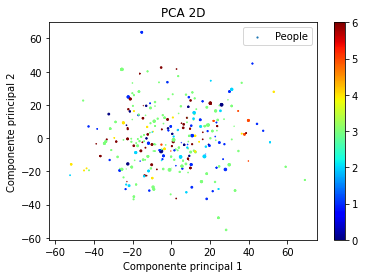

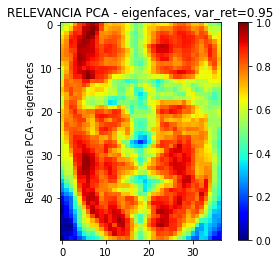

True

In [ ]:
#%% Paso 3 : Analisis exploratorio
#preproceso entrada  y salida para analisis exploratorio
img_path = '' #para guardar from google.colab import files plt.savefig("abc.png") files.download("abc.png") 
pre_exploratorio(Xtrain,ytrain,img_path,'People',lfw_people.images.shape[1],lfw_people.images.shape[2])

In [ ]:
#%% Paso 4 : Escoger modelo por gridsearchCV utilizando pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/
import joblib

steps=[[('rep',  PCA()),
        ('cla', GaussianNB())],
       [('rep',  PCA()),
        ('cla', LinearDiscriminantAnalysis())],
       [('rep',  PCA()),
        ('cla', SGDClassifier())],
       [('rep',  PCA()),
        ('cla', LinearSVC())],
       [('cla', SVC())],
       [('rep',  PCA()),
        ('cla', LogisticRegression())], 
      ]
parameters = [{
              'rep__n_components' : [0.8,0.9],              
              #'cla__C': [0.5,1],
              },
              {
              'rep__n_components' : [0.8,0.9],              
              #'cla__C': [0.5,1],
              },
              {
              'rep__n_components' : [0.8,0.9],              
              'cla__alpha': [0.0001,0.001],
              },
              {
              'rep__n_components' : [0.8,0.9],              
              'cla__C': [0.5,1],
              },
              {
             #'rep__n_components' : [0.8,0.9],              
             'cla__C': [0.1,1,100,500,1e3],
             'cla__gamma': [0.01, 0.1, 1,10, 100,1e3]     
              },
              {
              'rep__n_components' : [0.8,0.9],              
              'cla__C': [0.5,1],
              }
             ]

label_models = ['PCA_NB','PCA_LDA','PCA_SGD','PCA_SVCL','SVCK','PCA_Logistic']

best_model = []
filename = ''#'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/6
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.4s finished


modelo 2/6
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


modelo 3/6
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.1s finished


modelo 4/6
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.0s finished


modelo 5/6
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  4

modelo 6/6
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.3s finished


Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla', GaussianNB(priors=None, var_smoothing=1e-09))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  LinearDiscriminantAnalysis(n_components=None, priors=None,
                                             shrinkage=None, solver='svd',
                                             store_covariance=False,
                                             tol=0.0001))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_compone

Evaluando modelo 1/6


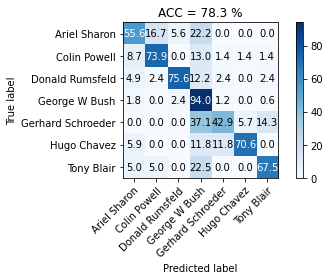

                   precision    recall  f1-score   support

     Ariel Sharon       0.42      0.56      0.48        18
     Colin Powell       0.89      0.74      0.81        69
  Donald Rumsfeld       0.86      0.76      0.81        41
    George W Bush       0.79      0.94      0.86       167
Gerhard Schroeder       0.71      0.43      0.54        35
      Hugo Chavez       0.80      0.71      0.75        17
       Tony Blair       0.77      0.68      0.72        40

         accuracy                           0.78       387
        macro avg       0.75      0.69      0.71       387
     weighted avg       0.79      0.78      0.78       387

Evaluando modelo 2/6


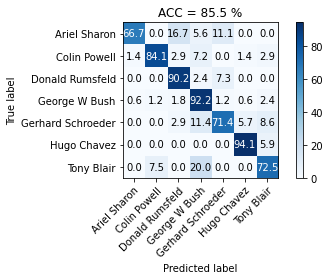

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.67      0.75        18
     Colin Powell       0.92      0.84      0.88        69
  Donald Rumsfeld       0.80      0.90      0.85        41
    George W Bush       0.89      0.92      0.91       167
Gerhard Schroeder       0.78      0.71      0.75        35
      Hugo Chavez       0.80      0.94      0.86        17
       Tony Blair       0.74      0.72      0.73        40

         accuracy                           0.86       387
        macro avg       0.83      0.82      0.82       387
     weighted avg       0.86      0.86      0.85       387

Evaluando modelo 3/6


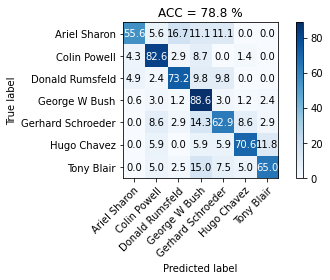

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.56      0.59        18
     Colin Powell       0.81      0.83      0.82        69
  Donald Rumsfeld       0.77      0.73      0.75        41
    George W Bush       0.86      0.89      0.87       167
Gerhard Schroeder       0.59      0.63      0.61        35
      Hugo Chavez       0.60      0.71      0.65        17
       Tony Blair       0.79      0.65      0.71        40

         accuracy                           0.79       387
        macro avg       0.72      0.71      0.71       387
     weighted avg       0.79      0.79      0.79       387

Evaluando modelo 4/6


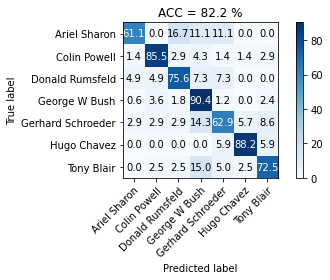

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.61      0.65        18
     Colin Powell       0.86      0.86      0.86        69
  Donald Rumsfeld       0.76      0.76      0.76        41
    George W Bush       0.89      0.90      0.90       167
Gerhard Schroeder       0.67      0.63      0.65        35
      Hugo Chavez       0.79      0.88      0.83        17
       Tony Blair       0.74      0.72      0.73        40

         accuracy                           0.82       387
        macro avg       0.77      0.77      0.77       387
     weighted avg       0.82      0.82      0.82       387

Evaluando modelo 5/6


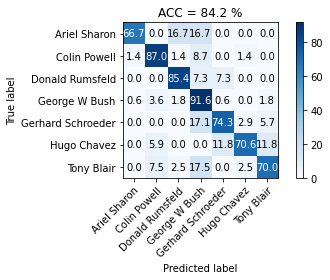

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.67      0.75        18
     Colin Powell       0.86      0.87      0.86        69
  Donald Rumsfeld       0.81      0.85      0.83        41
    George W Bush       0.86      0.92      0.89       167
Gerhard Schroeder       0.81      0.74      0.78        35
      Hugo Chavez       0.80      0.71      0.75        17
       Tony Blair       0.80      0.70      0.75        40

         accuracy                           0.84       387
        macro avg       0.83      0.78      0.80       387
     weighted avg       0.84      0.84      0.84       387

Evaluando modelo 6/6


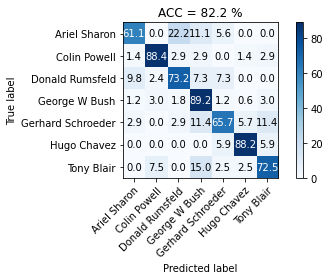

                   precision    recall  f1-score   support

     Ariel Sharon       0.58      0.61      0.59        18
     Colin Powell       0.87      0.88      0.88        69
  Donald Rumsfeld       0.75      0.73      0.74        41
    George W Bush       0.90      0.89      0.89       167
Gerhard Schroeder       0.74      0.66      0.70        35
      Hugo Chavez       0.75      0.88      0.81        17
       Tony Blair       0.71      0.72      0.72        40

         accuracy                           0.82       387
        macro avg       0.76      0.77      0.76       387
     weighted avg       0.82      0.82      0.82       387



In [ ]:
#%% Paso 5: evaluar sobre Xtest
my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=lfw_people.target_names,
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()
    #save_fig(path_img,label_models[i])                      
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=range(lfw_people.target_names.shape[0]),
                               target_names=lfw_people.target_names
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)